<a href="https://colab.research.google.com/github/OakesOng/Decathlon-Technical-Assessment/blob/main/Decathlon_Technical_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>QNS1: SQL Query</b>

```
CREATE LOCAL TEMP TABLE #TransactionWithCustomerInfo AS
SELECT
  td.*,
  c.Birthdate,
  DATEDIFF(YEAR, c.Birthdate, GETDATE()) AS Age,
  CASE
    WHEN DATEDIFF(YEAR, c.Birthdate, GETDATE()) < 20 THEN 'Teens'
    WHEN DATEDIFF(YEAR, c.Birthdate, GETDATE()) < 40 THEN 'Young Adults'
    WHEN DATEDIFF(YEAR, c.Birthdate, GETDATE()) < 60 THEN 'Adults'
    ELSE 'Seniors'
  END AS AgeRange
FROM TransactionDetail AS td
INNER JOIN Customer AS c ON td.ctm_customer_id = c.loyalty_card_num
WHERE c.loyalty_card_num <> 'NA';
```

-- You can now use the #TransactionWithCustomerInfo table for further analysis


In [14]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Recruitment_Transactions_ToBeDistributed.csv")
df.head()

,Unnamed: 0,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
0,1,7-1034-1034-20200708214026-101-8628,2020-07-08 21:40:26,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
1,2,7-1034-1034-20200708164857-211-1734,2020-07-08 16:48:57,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
2,3,7-1034-1034-20200701155410-102-6163,2020-07-01 15:54:10,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
3,4,7-1034-1034-20200713202706-102-7516,2020-07-13 20:27:06,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
4,5,7-1034-1034-20200727160812-211-4800,2020-07-27 16:08:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0


In [15]:
df.shape

(5496751, 11)

In [16]:
df.isnull().sum()

Unnamed: 0                      0
the_transaction_id              0
the_date_transaction            0
sku_idr_sku                     0
product_type                  878
sports                        656
but_name_business_unit          0
ctm_customer_id           2059281
the_to_type                     0
f_qty_item                      0
f_to_tax_in                     0
dtype: int64

In [17]:
df1 = df.copy()

# <b> QNS2 (a): Average value of basket size and basket value for members and non-members group by store

In [18]:
df_nonMem = df1[df1['ctm_customer_id'].isna()]
df_nonMem_offline = df_nonMem[df_nonMem['but_name_business_unit'] != 'Website']
df_nonMem_offline_mean_size = df_nonMem_offline.f_qty_item.groupby(df_nonMem_offline['but_name_business_unit']).mean()

In [19]:
df_nonMem_offline.shape

(2055914, 11)

In [20]:
df_mem = df1[df1['ctm_customer_id'].notna()]
df_mem_offline = df_mem[df_mem['but_name_business_unit'] != 'Website']
df_mem_offline_mean_size = df_mem_offline.f_qty_item.groupby(df_mem_offline['but_name_business_unit']).mean()

In [21]:
df_mem.shape

(3437470, 11)

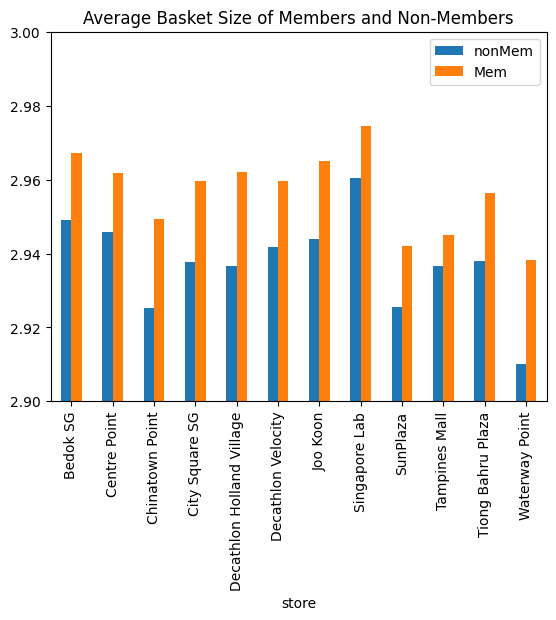

In [22]:
import matplotlib.pyplot as plt

x = df_nonMem_offline_mean_size.index.tolist()
y1 = df_nonMem_offline_mean_size.values.tolist()
y2 = df_mem_offline_mean_size.values.tolist()

temp = pd.DataFrame({'store': x,
    'nonMem': y1,
    'Mem': y2})
temp.plot('store',['nonMem','Mem'], kind="bar")
plt.ylim(bottom=2.9,top=3.0)
plt.title("Average Basket Size of Members and Non-Members")
plt.show()



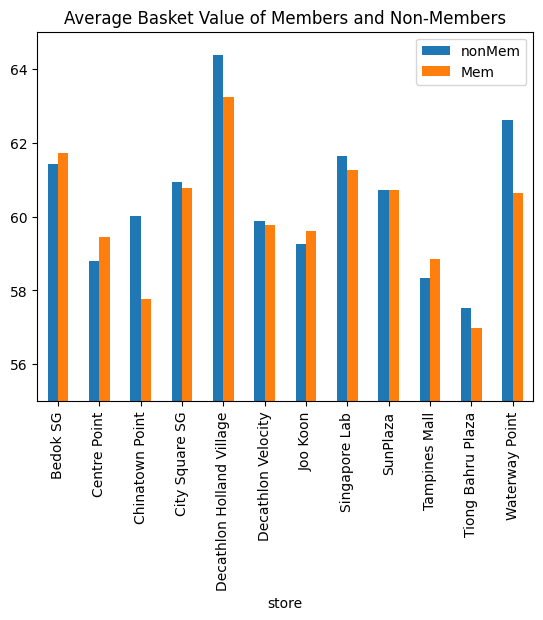

In [23]:
df_mem_offline_mean_value = df_mem_offline.f_to_tax_in.groupby(df_mem_offline['but_name_business_unit']).mean()
df_nonMem_offline_mean_value = df_nonMem_offline.f_to_tax_in.groupby(df_nonMem_offline['but_name_business_unit']).mean()
x = df_nonMem_offline_mean_value.index.tolist()
y1 = df_nonMem_offline_mean_value.values.tolist()
y2 = df_mem_offline_mean_value.values.tolist()

temp = pd.DataFrame({'store': x,
    'nonMem': y1,
    'Mem': y2})
temp.plot('store',['nonMem','Mem'], kind="bar")
plt.ylim(bottom=55,top=65)
plt.title("Average Basket Value of Members and Non-Members")
plt.show()

#<b>QNS2 (b): Proportion of members mode of purchase in each possible channels</b>

In [24]:
df_mem.shape

(3437470, 11)

In [25]:
df_mem.isnull().sum()

Unnamed: 0                  0
the_transaction_id          0
the_date_transaction        0
sku_idr_sku                 0
product_type              458
sports                    308
but_name_business_unit      0
ctm_customer_id             0
the_to_type                 0
f_qty_item                  0
f_to_tax_in                 0
dtype: int64

In [26]:
len(df_mem.ctm_customer_id.unique())

384897

In [27]:
df_mem_store = df_mem.groupby('ctm_customer_id')['but_name_business_unit'].apply(lambda x: x.unique()).reset_index(name='store_visited')

In [28]:
df_mem_store.head(5)

,ctm_customer_id,store_visited
0,000DFTLRKY,[Singapore Lab]
1,000FX6RHTM,"[Joo Koon, Singapore Lab]"
2,000NZ1KH93,"[Singapore Lab, SunPlaza]"
3,000R842PBV,[Website]
4,0014SWGO7X,[Centre Point]


In [29]:
# location of Decathlon 2024 cleaned from official website
store_list = {}
store_list['Singapore Lab'] = 'experienceStore'
store_list['Centre Point'] = 'experienceStore'
store_list['City Square SG'] = 'experienceStore'
store_list['Chinatown Point'] = 'clickAndcollect'
store_list['Tiong Bahru Plaza'] = 'clickAndcollect'
store_list['Decathlon Holland Village'] = 'clickAndcollect'
store_list['Clementi'] = 'clickAndcollect'
store_list['SunPlaza'] = 'clickAndcollect'
store_list['Joo Koon'] = 'experienceStore'
store_list['Tampines Mall'] = 'clickAndcollect'
store_list['Bedok SG'] = 'experienceStore'
store_list['Decathlon Velocity'] = 'clickAndcollect'
store_list['Westgate'] = 'clickAndcollect'
store_list['Waterway Point'] = 'clickAndcollect'
store_list['Northshore'] = 'experienceStore'

In [35]:
# feature engineering members purchase location based on store visited

df_mem_store['experienceStore'] = df_mem_store['store_visited'].apply(lambda x: 1 if any(k in x and store_list[k] == 'experienceStore' for k in store_list.keys()) else 0)
df_mem_store['clickAndcollect'] = df_mem_store['store_visited'].apply(lambda x: 1 if any(k in x and store_list[k] == 'clickAndcollect' for k in store_list.keys()) else 0)
df_mem_store['online'] = df_mem_store['store_visited'].apply(lambda x: 1 if 'website' in [i.lower() for i in x] else 0)


In [40]:
'''This cell feature engineer the mode of purchase by members. Total is 2^3 - 1 = 7 choices since the last option all negative doesn't apply due to nature of data being a transaction data'''

# for members that uses all three modes of purchase, logged value 1 in the under df_mem_store['all] column, else 0
df_mem_store['all'] = 0
df_mem_store.loc[(df_mem_store['experienceStore'] == 1) & (df_mem_store['clickAndcollect'] == 1) & (df_mem_store['online'] == 1), 'all'] = 1

# for members that purchase in experienceStore and clickAndCollect only, logged value 1 in the under df_mem_store['ccExp'] column, else 0
df_mem_store['ccExp'] = 0
df_mem_store.loc[(df_mem_store['experienceStore'] == 1) & (df_mem_store['clickAndcollect'] == 1) & (df_mem_store['online'] == 0), 'ccExp'] = 1

# for members that purchase in experienceStore and online only, logged value 1 in the under df_mem_store['expOn'] column, else 0
df_mem_store['expOn'] = 0
df_mem_store.loc[(df_mem_store['experienceStore'] == 1) & (df_mem_store['clickAndcollect'] == 0) & (df_mem_store['online'] == 1), 'expOn'] = 1

# for members that purchase in clickedAndCollect and online only, logged value 1 in the under df_mem_store['ccOn'] column, else 0
df_mem_store['ccOn'] = 0
df_mem_store.loc[(df_mem_store['experienceStore'] == 0) & (df_mem_store['clickAndcollect'] == 1) & (df_mem_store['online'] == 1), 'ccOn'] = 1

# for members that purchase in experienceStore only, logged value 1 in the under df_mem_store['expEx'] column, else 0
df_mem_store['expEx'] = 0
df_mem_store.loc[(df_mem_store['experienceStore'] == 1) & (df_mem_store['clickAndcollect'] == 0) & (df_mem_store['online'] == 0), 'expEx'] = 1

# for members that purchase in clickAndcollect only, logged value 1 in the under df_mem_store['ccEx'] column, else 0
df_mem_store['ccEx'] = 0
df_mem_store.loc[(df_mem_store['experienceStore'] == 0) & (df_mem_store['clickAndcollect'] == 1) & (df_mem_store['online'] == 0), 'ccEx'] = 1

# for members that purchase in online only, logged value 1 in the under df_mem_store['onEx'] column, else 0
df_mem_store['onEx'] = 0
df_mem_store.loc[(df_mem_store['experienceStore'] == 0) & (df_mem_store['clickAndcollect'] == 0) & (df_mem_store['online'] == 1), 'onEx'] = 1


In [44]:
df_mem_store.head()

,ctm_customer_id,store_visited,experienceStore,clickAndcollect,online,all,ccExp,expOn,ccOn,expEx,ccEx,onEx
0,000DFTLRKY,[Singapore Lab],1,0,0,0,0,0,0,1,0,0
1,000FX6RHTM,"[Joo Koon, Singapore Lab]",1,0,0,0,0,0,0,1,0,0
2,000NZ1KH93,"[Singapore Lab, SunPlaza]",1,1,0,0,1,0,0,0,0,0
3,000R842PBV,[Website],0,0,1,0,0,0,0,0,0,1
4,0014SWGO7X,[Centre Point],1,0,0,0,0,0,0,1,0,0


In [48]:
# Proportion Results Cell
choices = ['all','ccExp','expOn','ccOn','expEx','ccEx','onEx']
choice_dictionary = {}
choice_dictionary['all'] = 'All Modes'
choice_dictionary['ccExp'] = 'Click & Collect + Experience Store '
choice_dictionary['expOn'] = 'Experience Store + Online'
choice_dictionary['ccOn'] = 'Click & Collect + Online'
choice_dictionary['expEx'] = 'Only Experience Store'
choice_dictionary['ccEx'] = 'Only Click & Collect'
choice_dictionary['onEx'] = 'Only Online'

for i in choices:
  fraction = sum(df_mem_store[i]) / len(df_mem_store)
  print(str(choice_dictionary[i]) + ": " + str(round(fraction * 100, 2)) + "%")

All Modes: 2.82%
Click & Collect + Experience Store : 7.02%
Experience Store + Online: 8.81%
Click & Collect + Online: 2.43%
Only Experience Store: 52.52%
Only Click & Collect: 9.15%
Only Online: 17.25%


#<b>QNS2 (c): Most popular timing in Stores

In [49]:
df1.head()

,Unnamed: 0,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
0,1,7-1034-1034-20200708214026-101-8628,2020-07-08 21:40:26,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
1,2,7-1034-1034-20200708164857-211-1734,2020-07-08 16:48:57,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
2,3,7-1034-1034-20200701155410-102-6163,2020-07-01 15:54:10,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
3,4,7-1034-1034-20200713202706-102-7516,2020-07-13 20:27:06,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
4,5,7-1034-1034-20200727160812-211-4800,2020-07-27 16:08:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0


In [57]:
import datetime
df1['dayOfWeek'] = df1['the_date_transaction'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%A')) # obtaining the day of the week base on given date
df1['hour'] = df1['the_date_transaction'].apply(lambda x: int(x.split(' ')[1].split(':')[0])) # obtaining the hour in the time given
df_time = df1[['the_date_transaction','dayOfWeek','hour','but_name_business_unit']].copy() # extract the time data out
df_time.head(5)


,the_date_transaction,dayOfWeek,hour,but_name_business_unit
0,2020-07-08 21:40:26,Wednesday,21,City Square SG
1,2020-07-08 16:48:57,Wednesday,16,City Square SG
2,2020-07-01 15:54:10,Wednesday,15,City Square SG
3,2020-07-13 20:27:06,Monday,20,City Square SG
4,2020-07-27 16:08:12,Monday,16,City Square SG


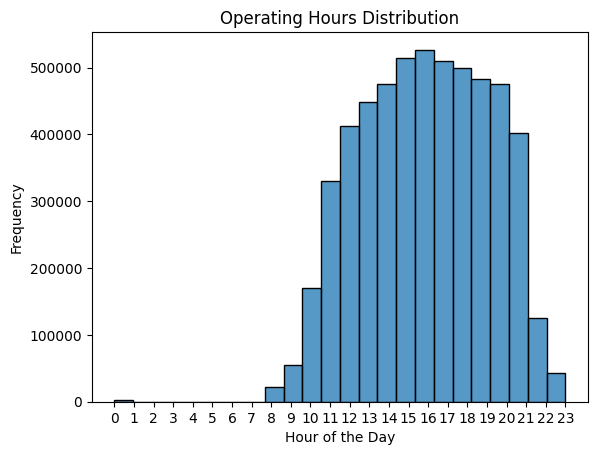

In [59]:
# Distribution of traffic based on operating hours
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram
sns.histplot(data=df_time, x="hour", bins=24)

# Set the title and axis labels
plt.title("Operating Hours Distribution")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")

# Set the x-axis tick labels to be the hours of the day
plt.xticks(ticks=range(0, 24, 1), labels=range(0, 24, 1))

# Show the plot
plt.show()


In [86]:
#Hypothesis Testing

import scipy.stats as stats
# !pip install pingouin
import pingouin as pg

# Check for normality
display(pg.normality(df_time['hour'])) # Perform a normality test
                                        # We notice that the distribution is not normal


# Apply log transformation for normalization
transformed_hour = np.log(df_time['hour'])

# Check for normality after transformation
display(pg.normality(transformed_hour))

# Define the null and alternative hypotheses
h0 = "The median of 'hour' is equal to 16."
ha = "The median of 'hour' is different from 16."  # Two-tailed alternative

# Perform the t-test
test_statistic, p_value = stats.ttest_1samp(df_time['hour'], 16)  # Adjust for paired data if applicable

# Set the significance level
alpha = 0.05

# Make a decision based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis:", h0)
    print("The median of 'hour' is likely different from 16.")
else:
    print("Fail to reject the null hypothesis:", h0)
    print("There is not enough evidence to conclude the median is different from 16.")


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
hour,0.942334,0.0,False


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
hour,NaN,1.0,True


Reject the null hypothesis: The median of 'hour' is equal to 16.
The median of 'hour' is likely different from 16.


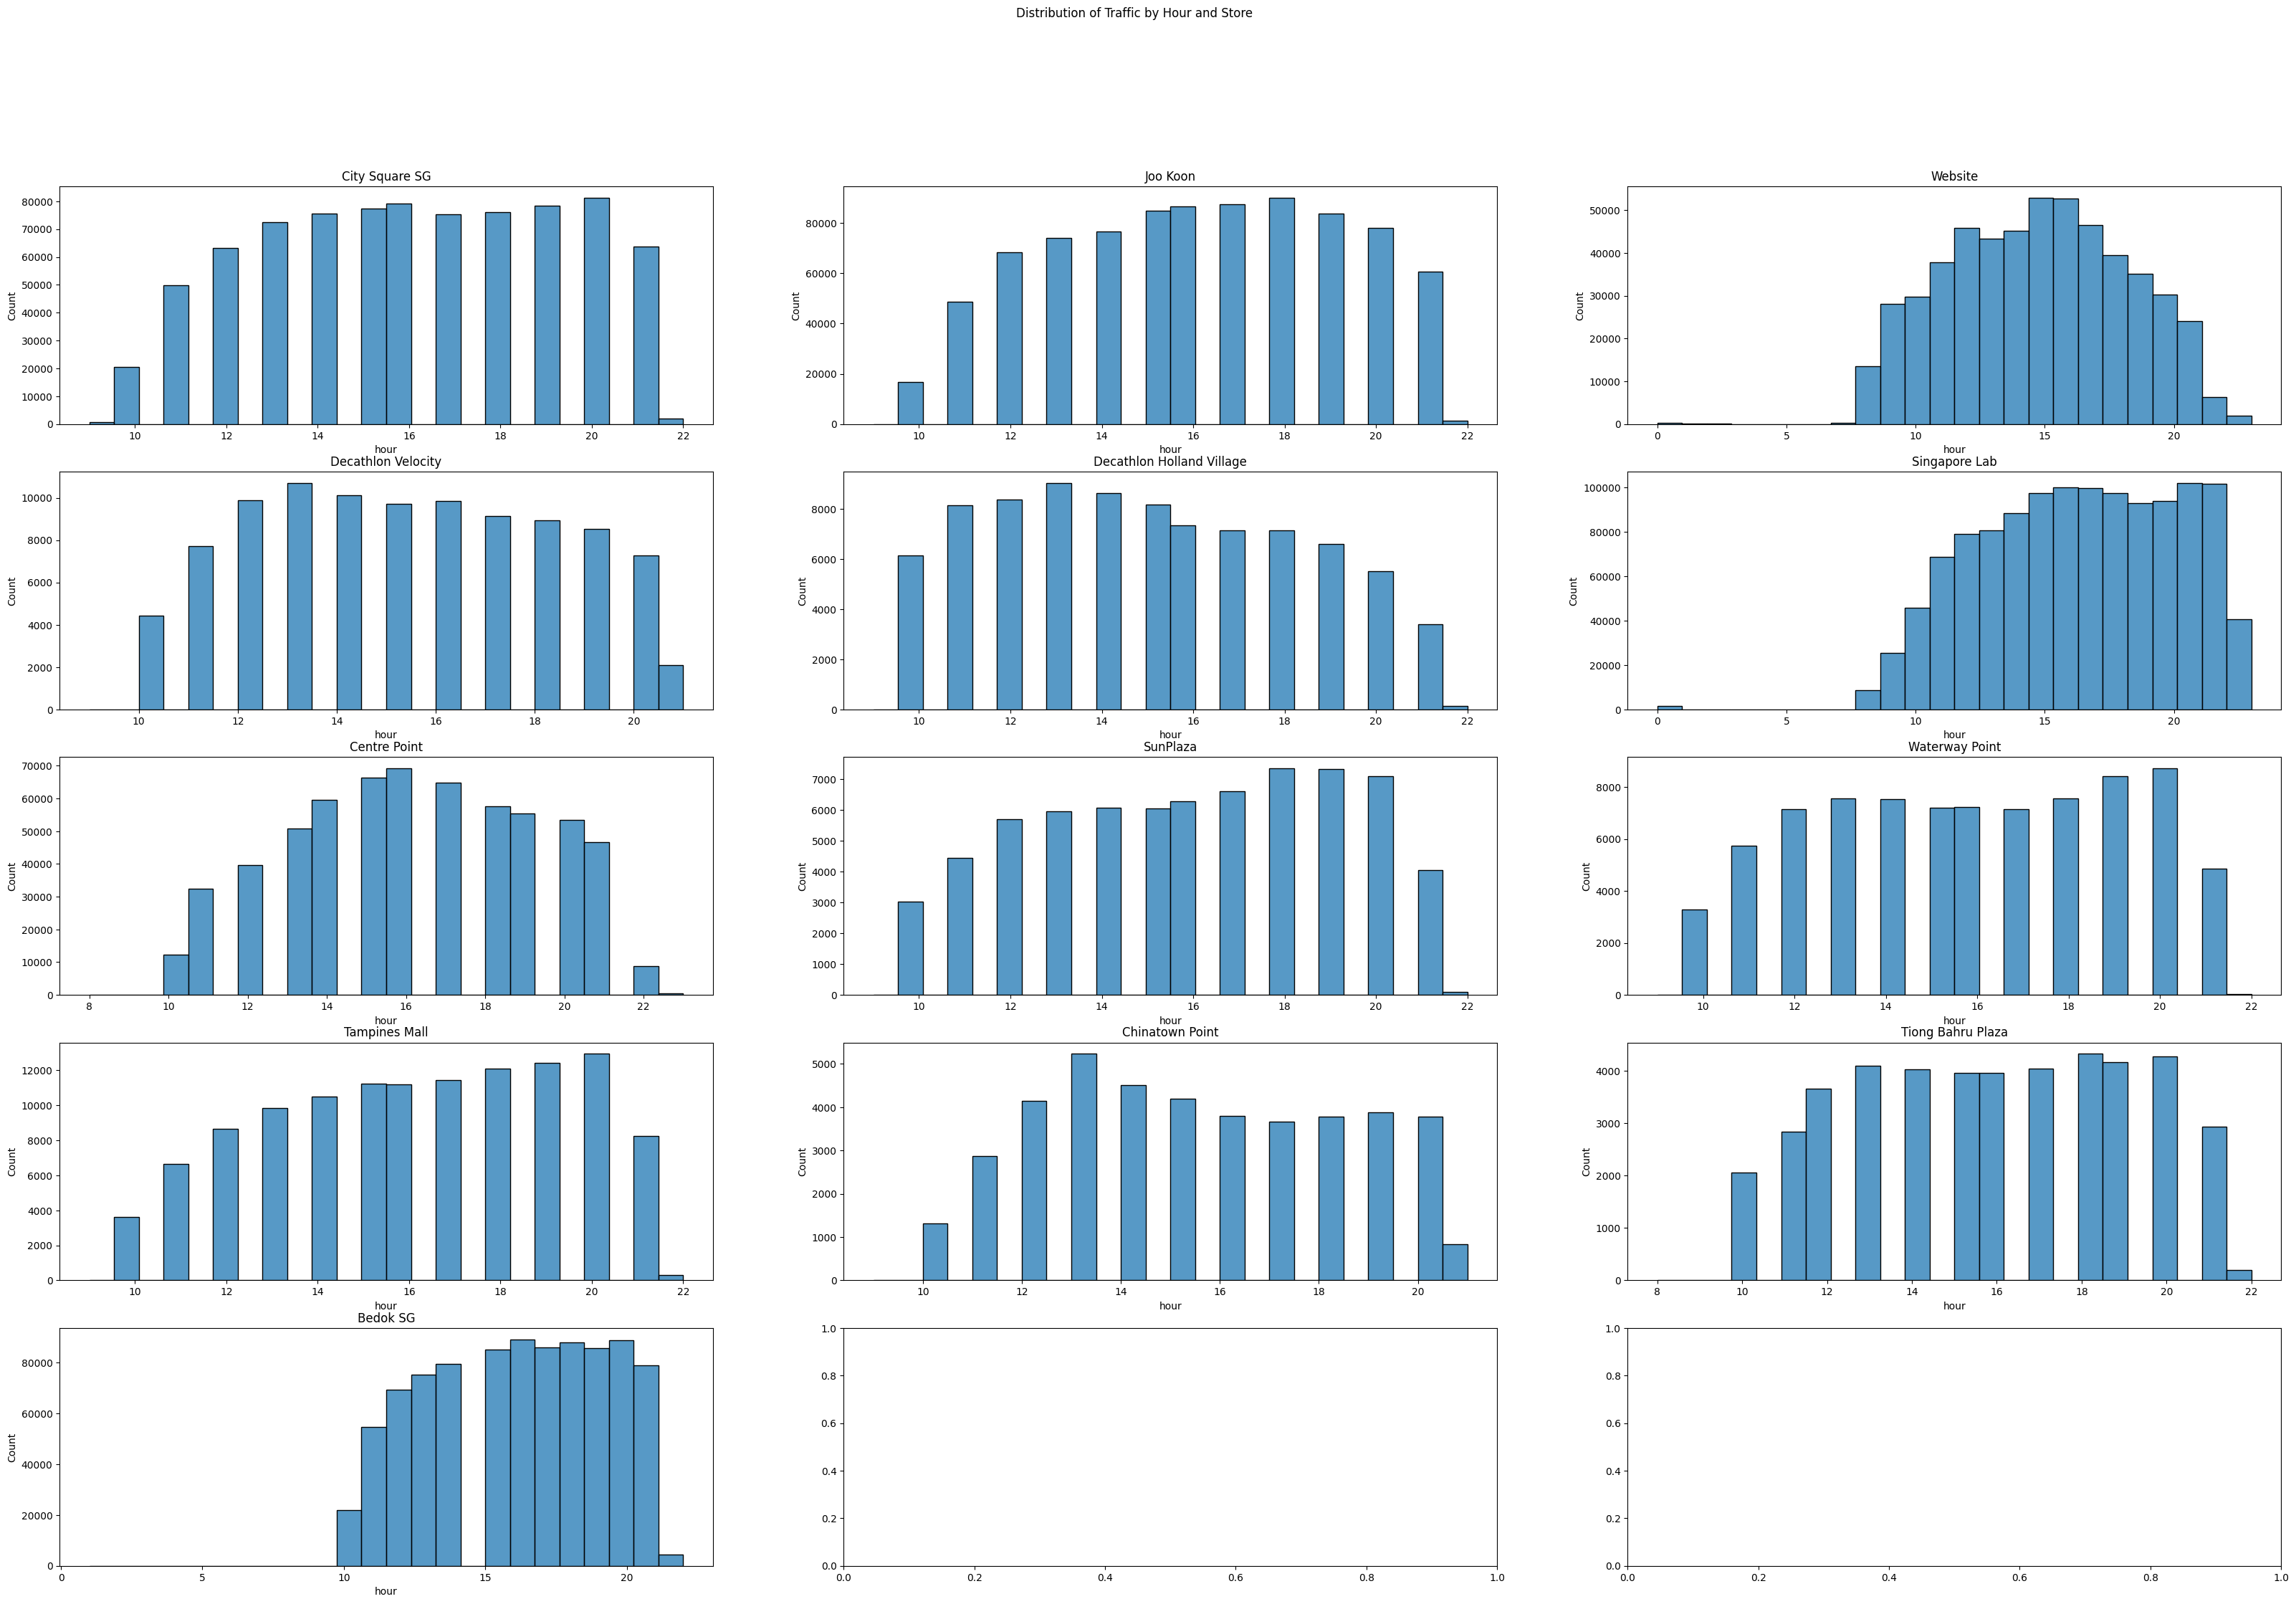

In [82]:
# Distribution of the traffic across store islandwide including website

import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with 5 rows and 3 columns
fig, axes = plt.subplots(5, 3, figsize=(40, 25))

# Iterate through the unique values of 'but_name_business_unit'
for i, store in enumerate(df_time['but_name_business_unit'].unique()):
  # Select the data for the current store
  df_store = df_time[df_time['but_name_business_unit'] == store]

  # Create a histogram of the hours
  sns.histplot(data=df_store, x="hour", bins=24, ax=axes[i // 3, i % 3])

  # Set the title of the subplot
  axes[i // 3, i % 3].set_title(store)

# Set the title of the overall figure
fig.suptitle('Distribution of Traffic by Hour and Store')

# Show the plot
plt.show()


#Traffic Patterns by Outlet

### Key Findings

* While overall traffic shows scattered peaks throughout the day, individual outlets have distinct peak periods.
* This suggests different customer segments and preferences across your outlets.

### Implications

* Blanket marketing and staffing strategies might not be optimal, as there's no single "golden hour" for all outlets.
* Targeting promotions and staff scheduling based on each outlet's unique traffic pattern can be more effective.

### Benefits of Data-Driven Approach

* Analyzing traffic patterns by outlet helps understand customer behavior and optimize operations for each location.
* This data-driven approach can lead to improved resource allocation, marketing effectiveness, and ultimately, higher sales.


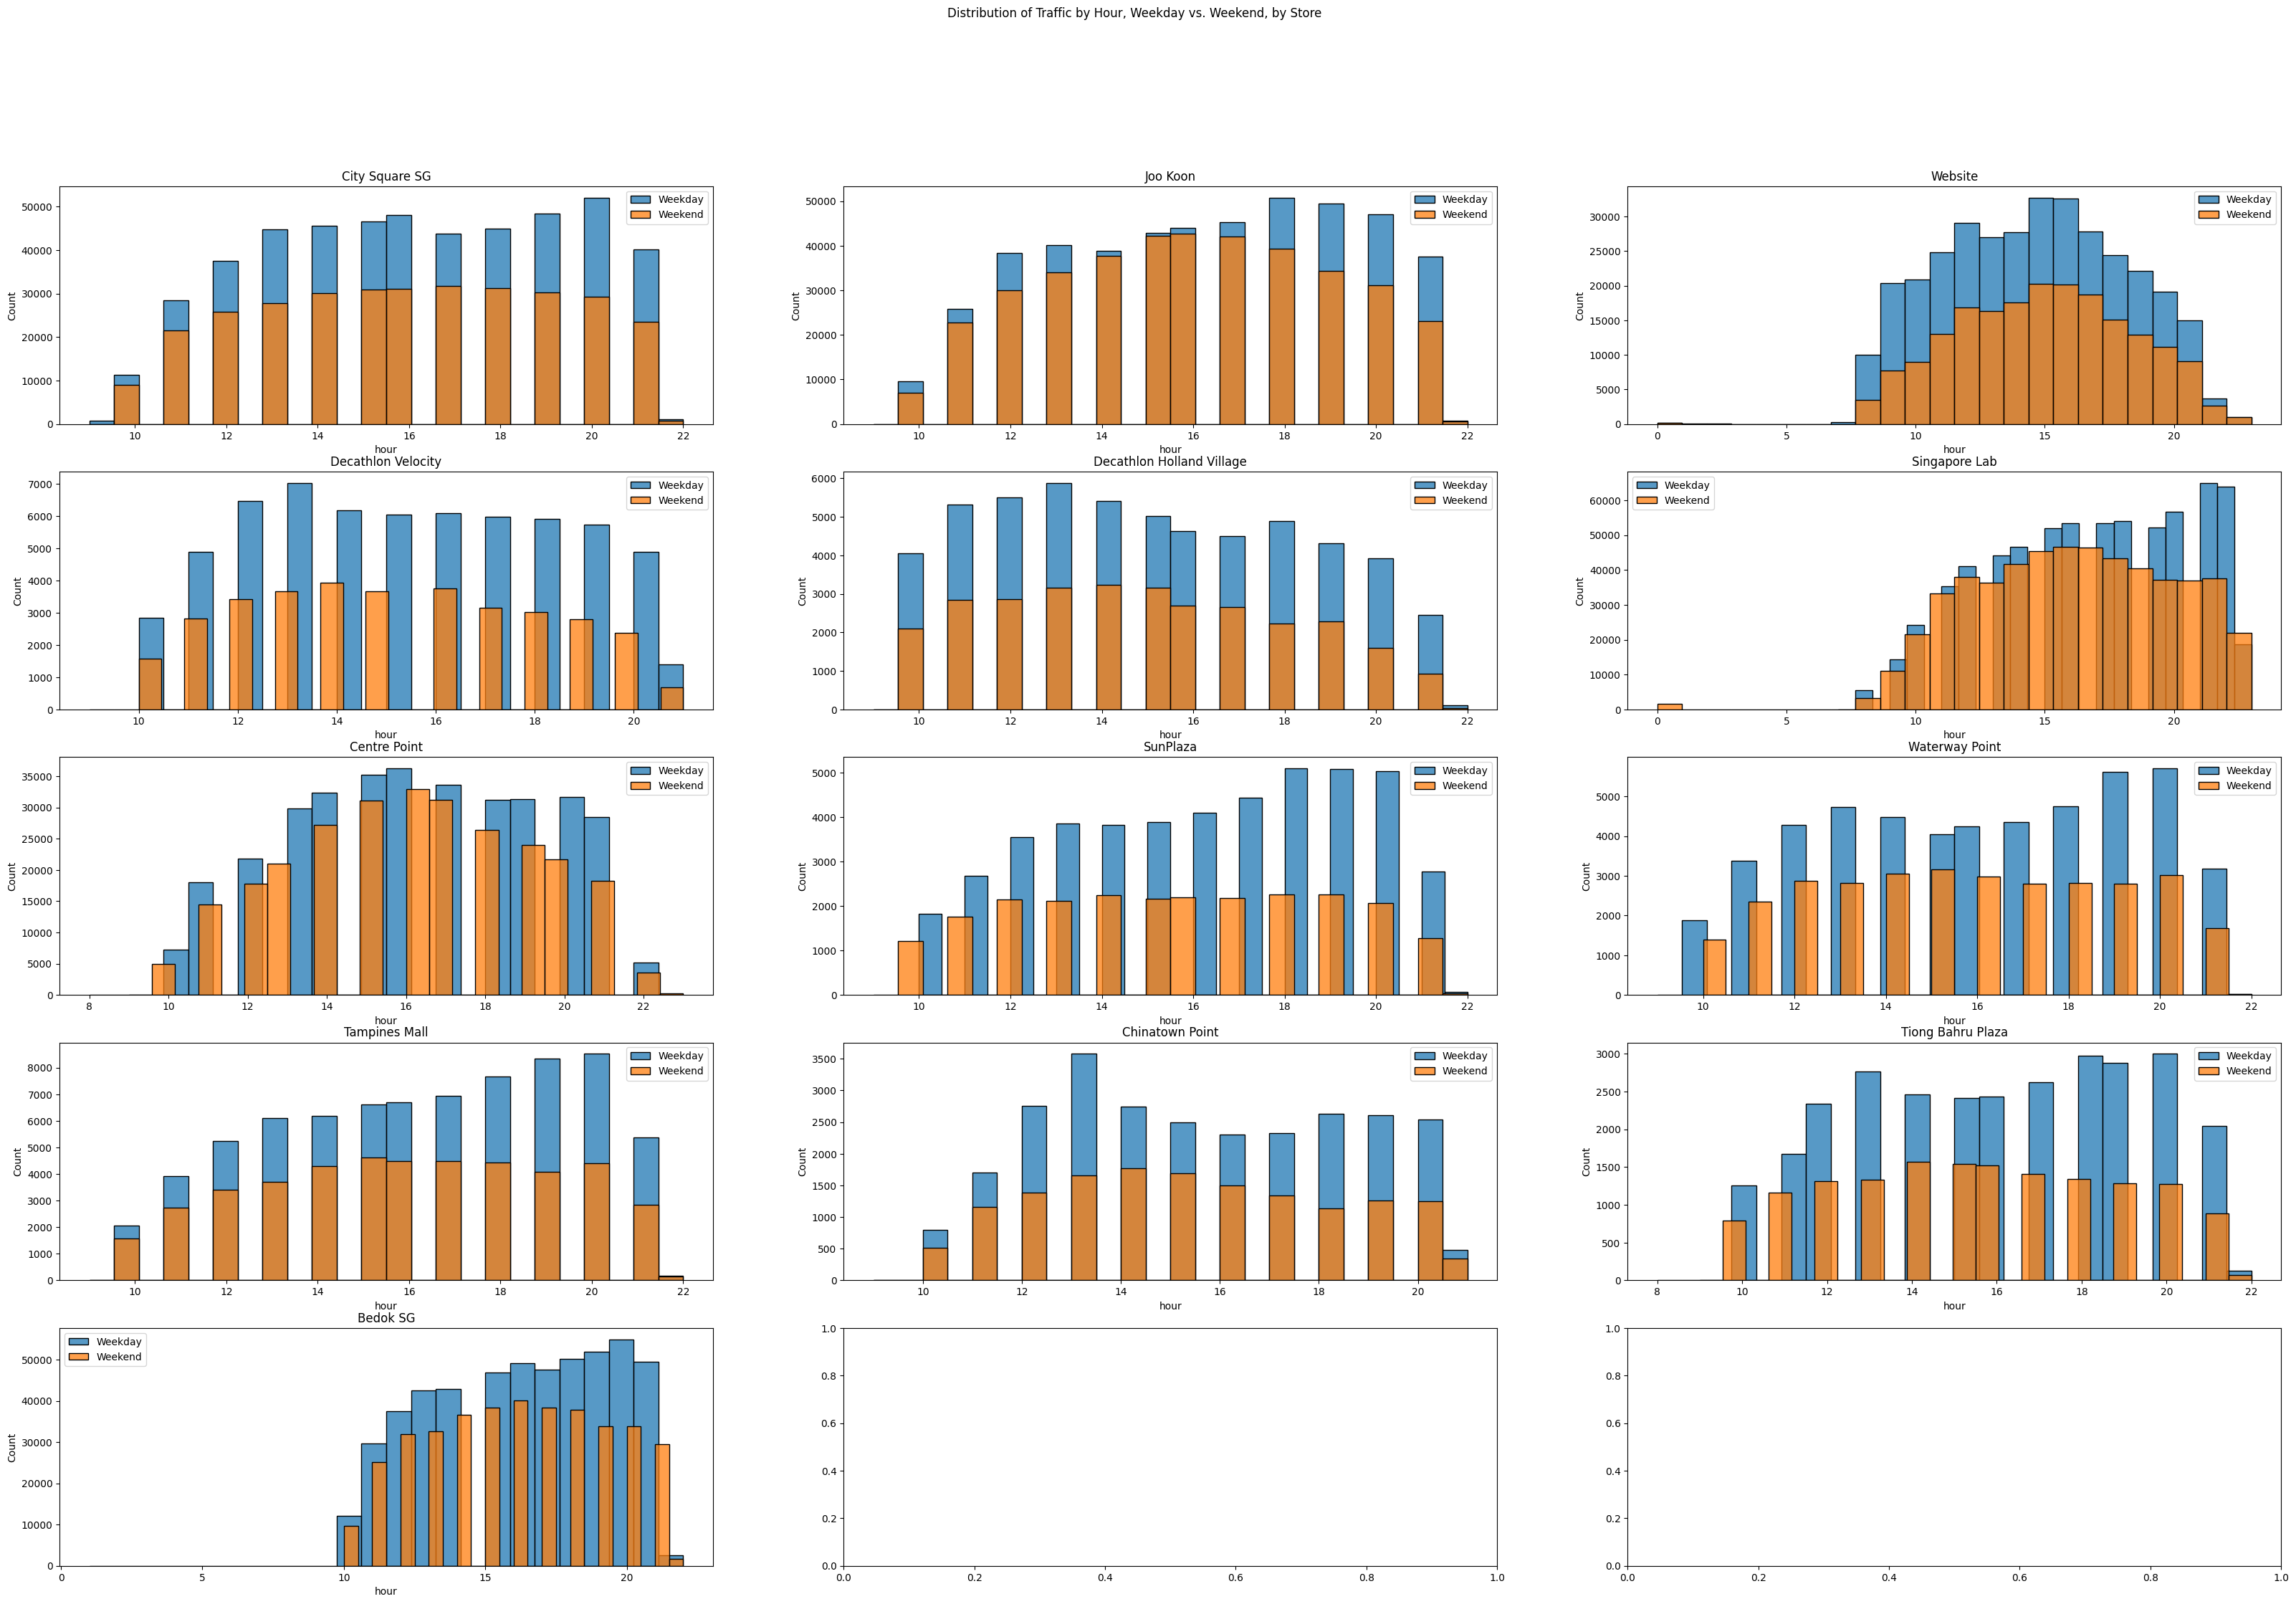

In [89]:
import matplotlib.pyplot as plt
# Create a subplot with 5 rows and 3 columns
fig, axes = plt.subplots(5, 3, figsize=(40, 25))

# Iterate through the unique values of 'but_name_business_unit'
for i, store in enumerate(df_time['but_name_business_unit'].unique()):
    # Select the data for the current store
    df_store = df_time[df_time['but_name_business_unit'] == store]

    # Create a histogram of the hours for weekdays and weekends
    sns.histplot(data=df_store[df_store['dayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])], x="hour", bins=24, ax=axes[i // 3, i % 3], label='Weekday')
    sns.histplot(data=df_store[df_store['dayOfWeek'].isin(['Saturday', 'Sunday'])], x="hour", bins=24, ax=axes[i // 3, i % 3], label='Weekend')

    # Set the title of the subplot
    axes[i // 3, i % 3].set_title(store)

    # Add legend
    axes[i // 3, i % 3].legend()

# Set the title of the overall figure
fig.suptitle('Distribution of Traffic by Hour, Weekday vs. Weekend, by Store')

# Show the plot
plt.show()


In [94]:
# Traffic count by days
pd.set_option('display.max_rows', None)
display(pd.DataFrame(df_time.groupby('but_name_business_unit').dayOfWeek.value_counts()))

dayOfWeek
but_name_business_unit    dayOfWeek           
Bedok SG                  Saturday      196805
                          Sunday        192910
                          Friday        127001
                          Monday        101415
                          Thursday      100343
                          Wednesday      96639
                          Tuesday        92174
Centre Point              Saturday      141489
                          Sunday        133518
                          Friday         84968
                          Monday         67214
                          Thursday       64746
                          Wednesday      63618
                          Tuesday        61989
Chinatown Point           Saturday        7955
                          Sunday          7083
                          Friday          6015
                          Thursday        5495
                          Wednesday       5171
                          Monday          5149
                          Tuesday         5148
City Square SG            Saturday      166305
                          Sunday        156478
                          Friday        120010
                          Thursday       97275
                          Monday         96688
                          Wednesday      91786
                          Tuesday        87211
Decathlon Holland Village Saturday       16017
                          Sunday         13804
                          Friday         12428
                          Thursday       11232
                          Wednesday      11182
                          Monday         10684
                          Tuesday        10486
Decathlon Velocity        Saturday       18510
                          Sunday         16407
                          Friday         13734
                          Thursday       12585
                          Monday         12506
                          Wednesday      12350
                          Tuesday        12290
Joo Koon                  Saturday      195185
                          Sunday        191743
                          Friday        121860
                          Thursday       93042
                          Monday         88606
                          Wednesday      87066
                          Tuesday        79778
Singapore Lab             Saturday      282616
                          Sunday        260039
                          Friday        179453
                          Thursday      131638
                          Monday        130197
                          Wednesday     123075
                          Tuesday       115660
SunPlaza                  Saturday       11971
                          Sunday         11944
                          Friday         10097
                          Thursday        9476
                          Monday          9165
                          Wednesday       9112
                          Tuesday         8363
Tampines Mall             Saturday       22985
                          Sunday         22278
                          Friday         16981
                          Thursday       15014
                          Monday         14378
                          Wednesday      13797
                          Tuesday        13696
Tiong Bahru Plaza         Sunday          7948
                          Saturday        7557
                          Friday          6264
                          Wednesday       5921
                          Thursday        5882
                          Tuesday         5511
                          Monday          5423
Waterway Point            Sunday         16533
                          Saturday       15208
                          Friday         11651
                          Thursday       10379
                          Wednesday      10057
                          Monday          9757
                          Tuesday         

## Key Finding: Experience Stores Exhibit Distinct Traffic Trend

While individual stores showcase unique traffic patterns, **experience stores share a common trend:**

* **Gradual peak in traffic until late afternoon:** This suggests a customer preference for visiting later in the day.
* **Slow decline in traffic thereafter:** This pattern is especially noticeable on weekends.
* **Similar trend observed on websites:** This indicates consistent customer behavior across online and offline channels.

## Insights and Recommendations

**Marketing Opportunity:**

* Consider targeted promotions or events in the late afternoon and evenings to capitalize on this peak traffic period, specifically for experience stores.

**Workforce Optimization:**

* Evaluate staffing needs based on the observed traffic patterns. Allocate additional personnel during peak hours and weekends to ensure smooth customer service.

**Weekend Focus:**

* While weekends generate higher transaction volume, investigate potential strategies to drive growth on weekdays.



# <b>QNS3: Sales Forecasting</b>
##Outlining the Approach to Forecast Decathlon Turnover
### <u>Problem Breakdown</u>:

This problem involves predicting the offline and online turnover for Decathlon Singapore in the first 3 months of 2021, using sales data from 2020.

<b>1. Features Identification</b>:

- Date: Month and year of the transaction (derived from the_date_transaction).<br>
- Transaction type: Online (the_to_type = "website") or Offline (the_to_type = "in-store").<br>
- Product type: Category of the item (product_type).<br>
- Sport: Category of the item (sports).<br>
- Business unit: Store or website (but_name_business_unit).<br>
- Customer type: Member (ctm_customer_id not NA) or non-member (ctm_customer_id = NA).<br>
- Quantity sold: Number of items sold (f_qty_item).<br>
- Turnover: Sales amount including VAT (f_to_tax_in).<br>

<b>2. State-of-the-art Methods</b>:

Several approaches can be considered, including:

Time series forecasting: <b>*ARIMA*, *SARIMA*, *Prophet*</b> can model seasonality and trends in historical data.<br>
Regression models: <b>*Linear regression*, *random forest regression*</b> can predict turnover based on features like date, product type, etc.<br>
Machine learning models: <b>*XGBoost*, *LightGBM*</b> can capture complex non-linear relationships between features and turnover.<br>
Generative AI: Perhaps <b>*TimeGPT*</b>, a generative model for time series, can be used to compare with these traditional proven methods and contrast the results.<br>

<b>3. Proposed Approach</b>:

A hybrid approach combining time series and machine learning is recommended:

Time series decomposition: Separate the trend, seasonality, and residual components of historical turnover data.
Feature engineering: Create new features like month-over-month changes, rolling averages, and interaction terms between features.
Machine learning model: Train a model (e.g., XGBoost) on the engineered features and decomposed time series data to predict future turnover for each month, transaction type, and product category.<br>

<b>4. Limitations and Caveats</b>:

Data accuracy and completeness: Model performance depends on data quality and potential missing values.<br>
External factors: Unexpected events like promotions, economic changes, or competitor actions might not be captured by the model.<br>
Model interpretability: Complex models like XGBoost might be less interpretable than simpler approaches.<br>

<b>5. Business Insights</b>:

Product and category performance: Identify top-performing products, categories, and their seasonality.<br>
Channel differences: Understand online vs. offline sales trends and customer behavior.<br>
Customer segmentation: Analyze member vs. non-member purchase patterns and target marketing accordingly.<br>

<b>6. Evaluation Metrics</b>:

Mean squared error (MSE): Measures the average squared difference between predicted and actual turnover.<br>
Mean absolute error (MAE): Measures the average absolute difference between predicted and actual turnover.<br>
R-squared: Represents the proportion of variance in actual turnover explained by the model.<br>
Tracking forecast accuracy: Monitor the model's performance on actual sales data for the first 3 months of 2021.<br>

*<b>Additional Recommendations</b>:

Regularly update the model with new data to improve accuracy and capture evolving trends.<br>
Visualize and communicate insights from the model to stakeholders in an understandable way.<br>
Consider incorporating external data sources like weather, holidays, or competitor promotions for further model improvement.<br>


This is a general outline, and the specific approach might need adjustments based on data availability, business context, and desired level of complexity.